In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100


In [5]:
print("="*60)
print("STEP 1: DATA LOADING & CLEANING")
print("="*60)

# Load data treating '?' as missing
data = pd.read_csv('/content/drive/MyDrive/ML_datasets/adult.csv', na_values='?')

# Strip whitespace from ALL object columns FIRST
data = data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# NOW identify any remaining '?' that might have had spaces
data = data.replace('?', np.nan)

print(f"\n✓ Dataset loaded: {data.shape[0]} rows × {data.shape[1]} columns")
print(f"✓ Missing values found: {data.isnull().sum().sum()}")

print("\n--- DATA INFO ---")
print(data.info())

print("\n--- FIRST 5 ROWS ---")
print(data.head())

print("\n--- DESCRIPTIVE STATISTICS (NUMERICAL) ---")
print(data.describe())

print("\n--- CATEGORY VALUE COUNTS (income) ---")
print(data['income'].value_counts())


STEP 1: DATA LOADING & CLEANING

✓ Dataset loaded: 32561 rows × 15 columns
✓ Missing values found: 4262

--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), ob


STEP 2: EXPLORATORY DATA ANALYSIS (RAW DATA)


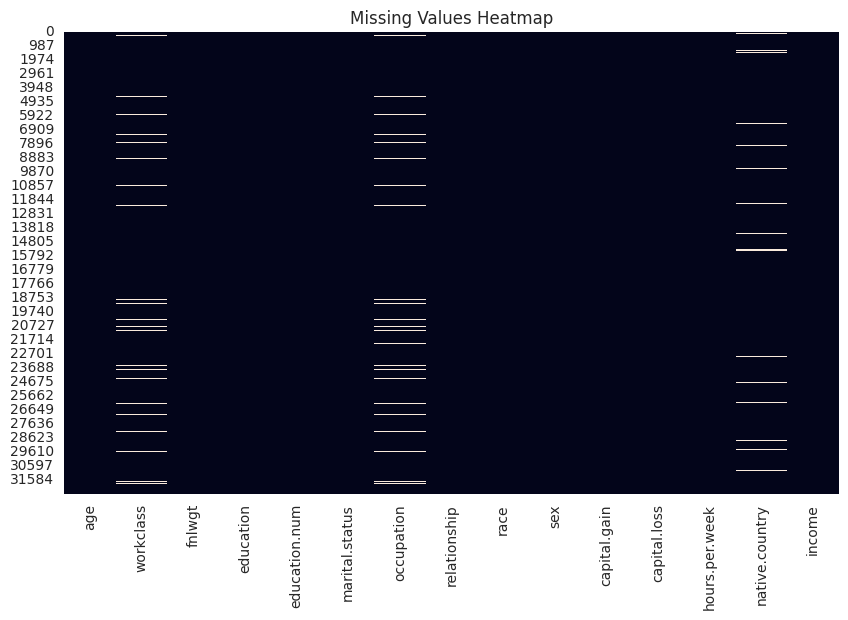

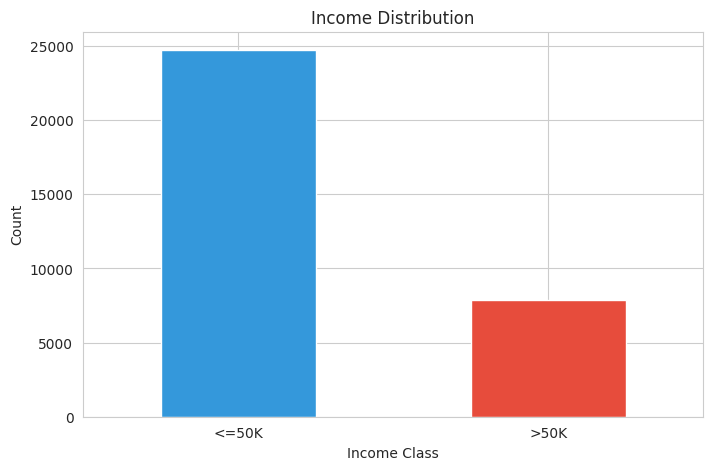

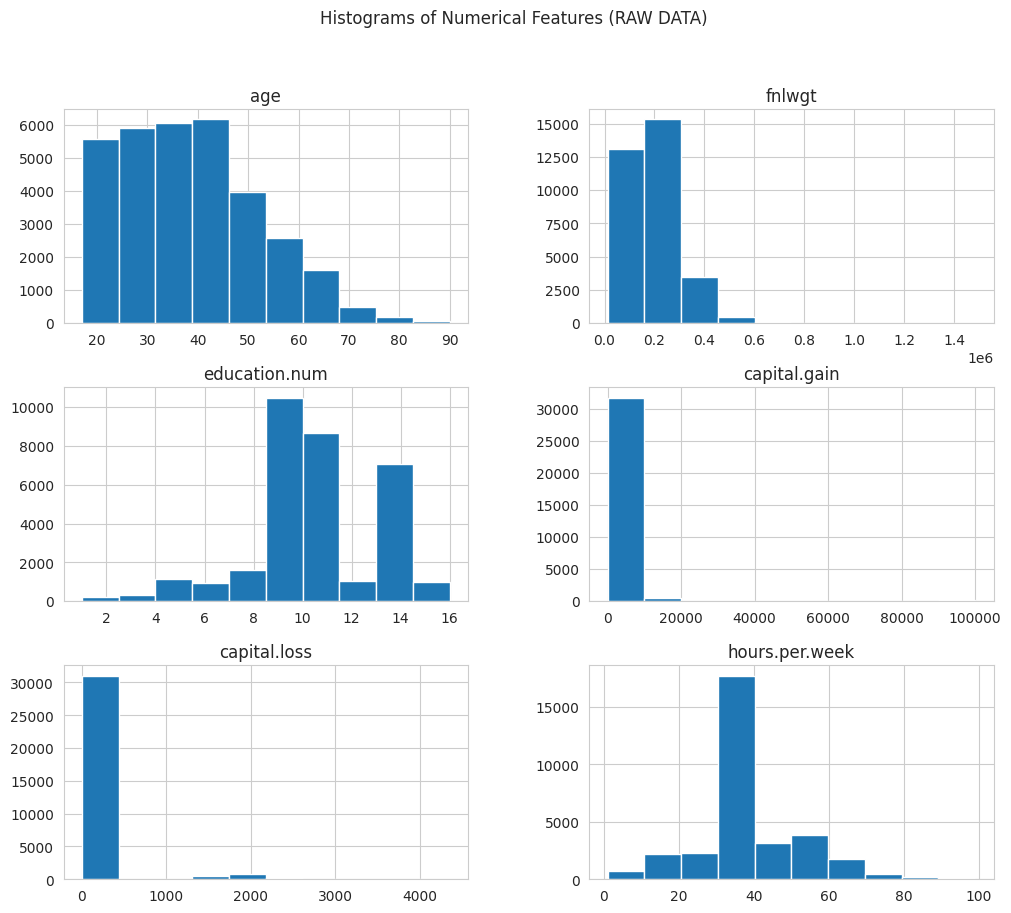

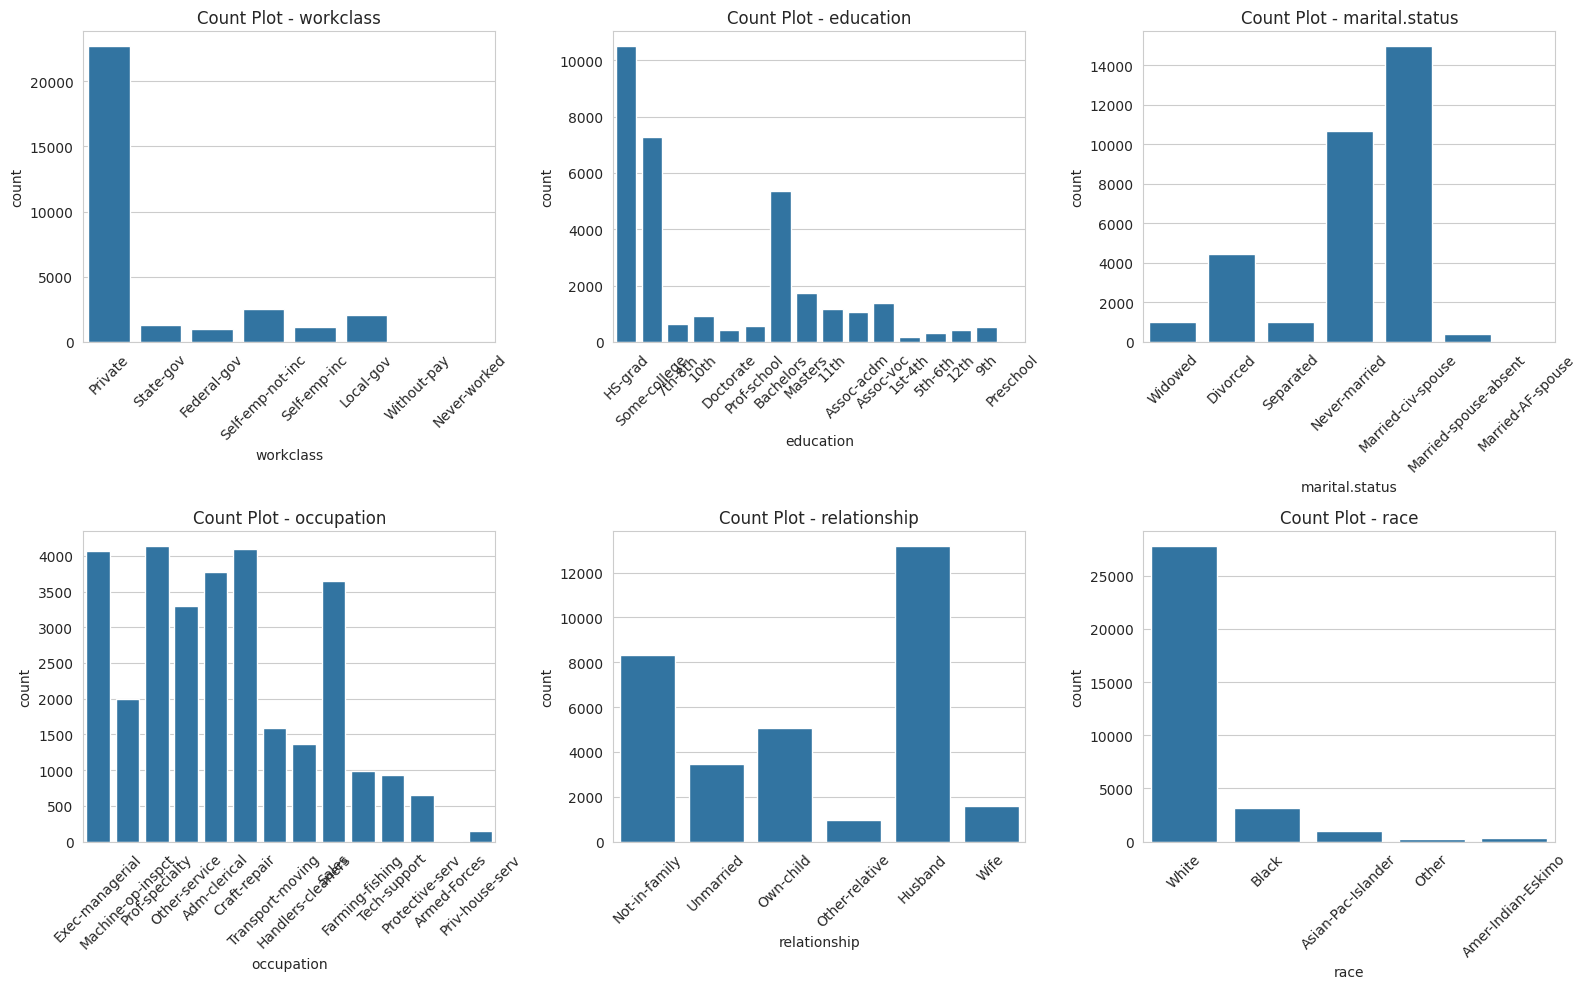

In [6]:
print("\n" + "="*60)
print("STEP 2: EXPLORATORY DATA ANALYSIS (RAW DATA)")
print("="*60)

# --- Missing Values Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# --- Income Distribution ---
plt.figure(figsize=(8,5))
data['income'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title("Income Distribution")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# --- Histograms of Numeric Features (BEFORE Transformation) ---
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(12,10))
plt.suptitle("Histograms of Numerical Features (RAW DATA)")
plt.show()

# --- Count Plots of Categorical Variables ---
categorical = data.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(2, 3, figsize=(16,10))
axes = axes.flatten()
for i, col in enumerate(categorical[:6]):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Count Plot - {col}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


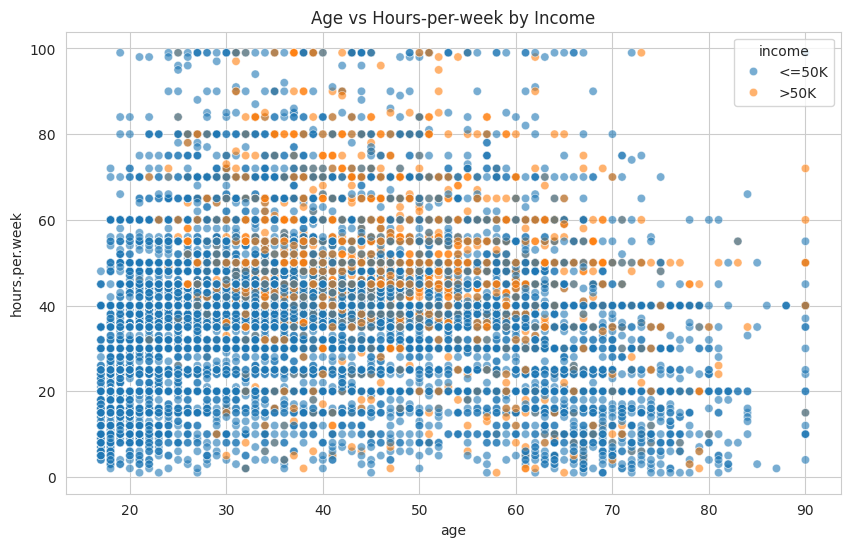

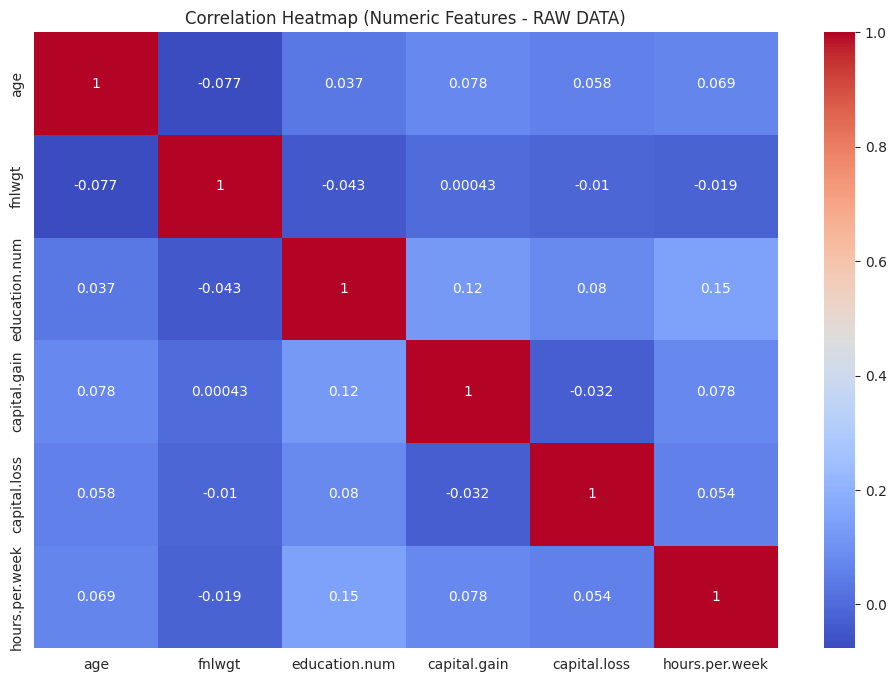

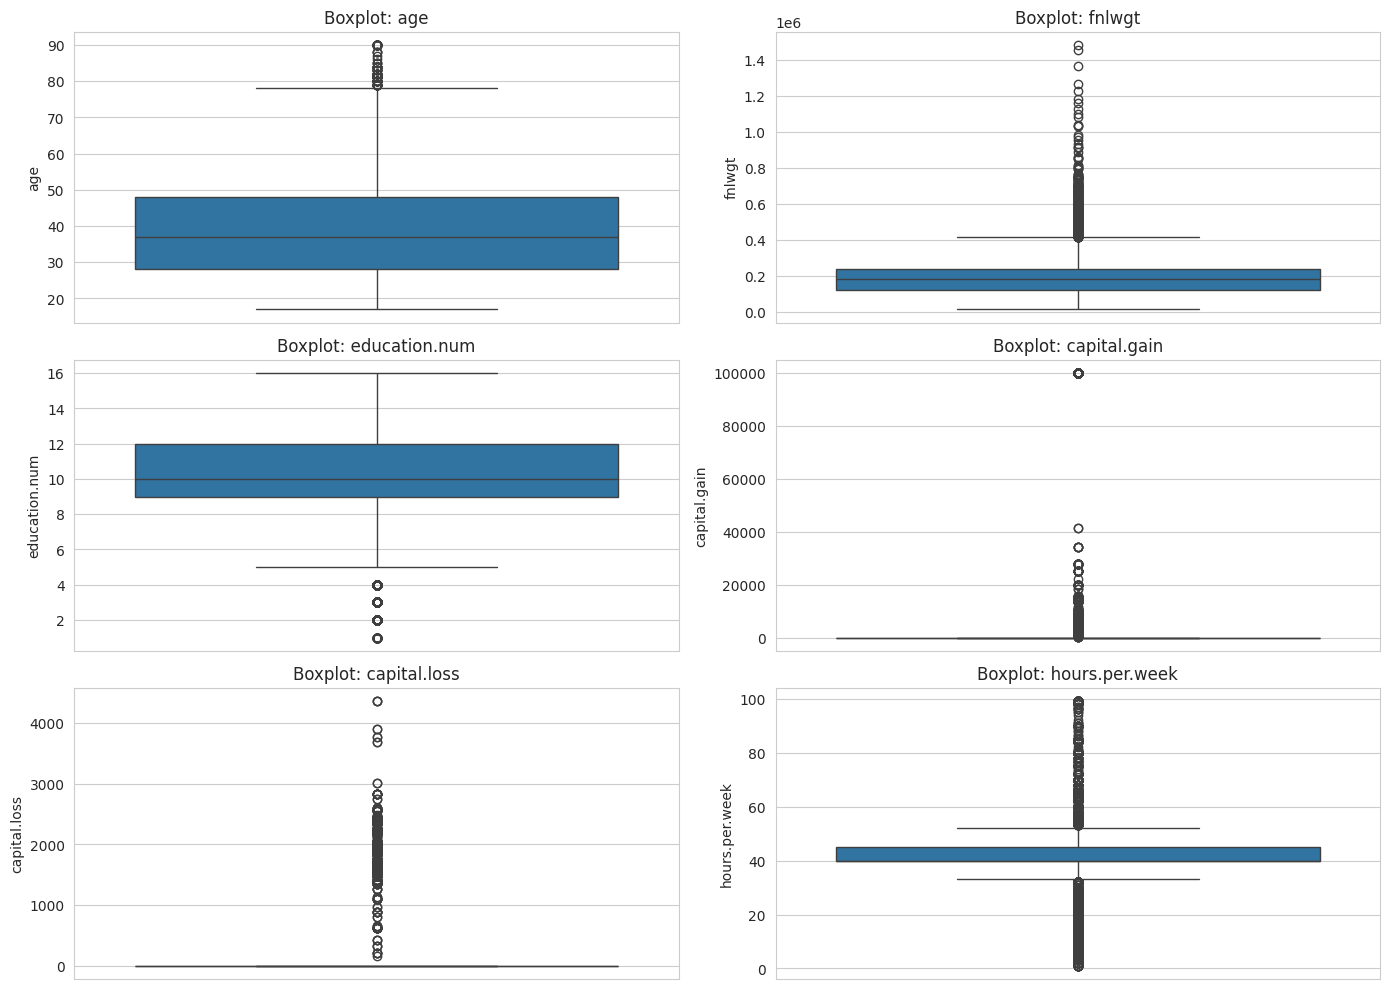

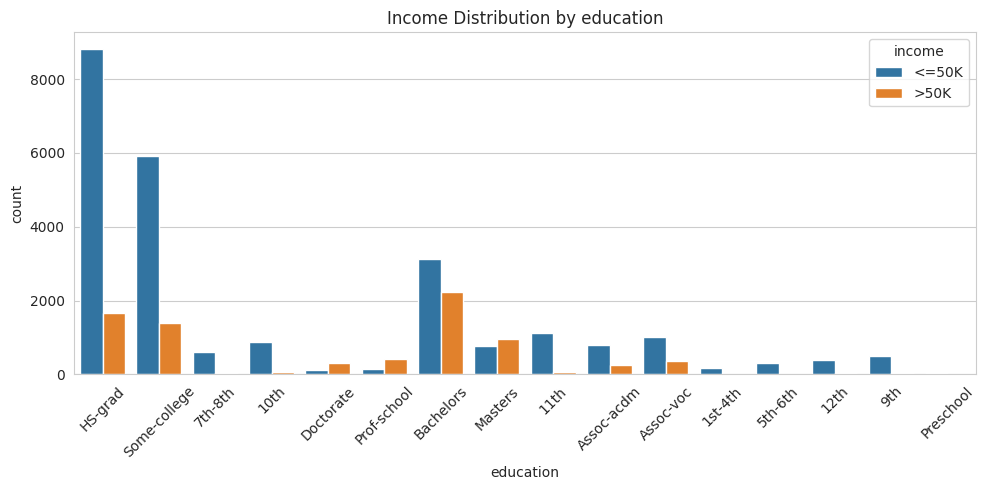

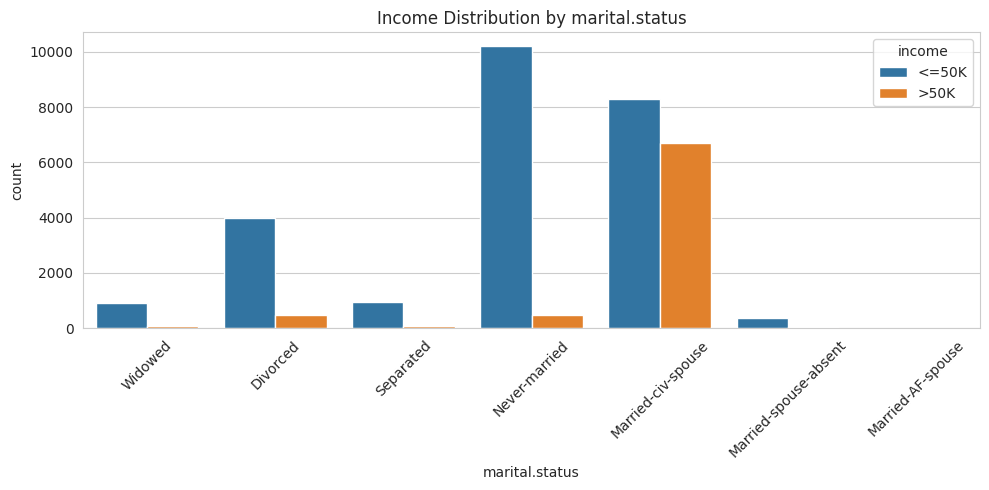

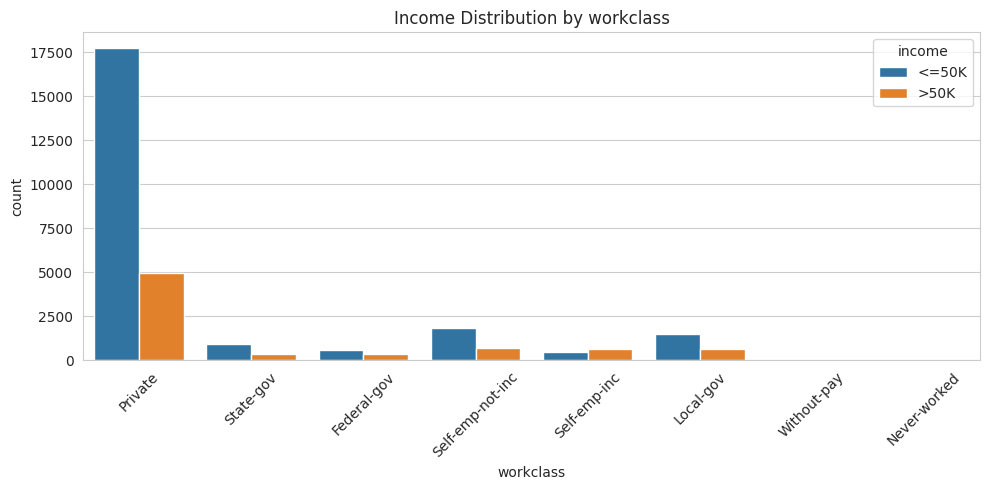

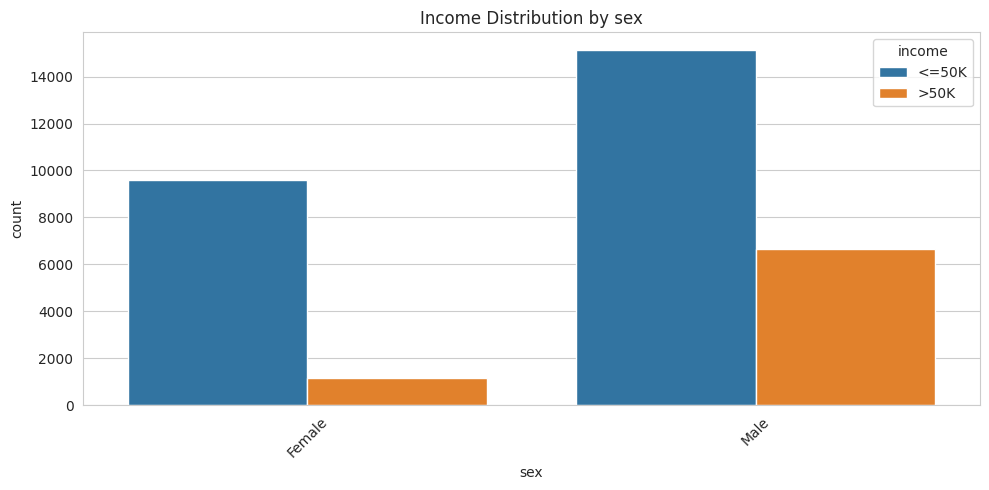

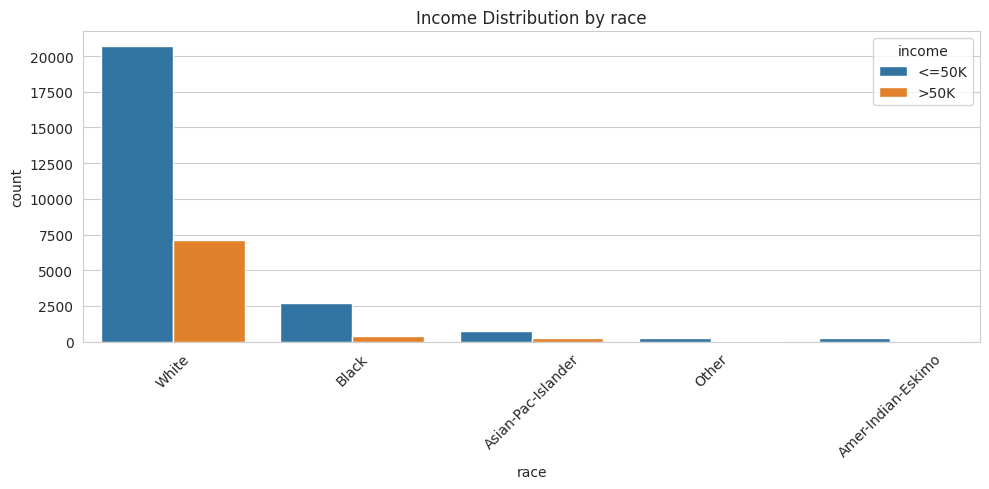

In [7]:
# --- Scatter Plot: Age vs Hours-per-week ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="age", y="hours.per.week", hue="income", alpha=0.6)
plt.title("Age vs Hours-per-week by Income")
plt.show()

# --- CORRELATION HEATMAP ---
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features - RAW DATA)")
plt.show()

# --- BOX-PLOTS (OUTLIERS IDENTIFICATION) ---
numeric_cols = ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

# --- Income Distribution by Selected Categorical Features ---
cat_features = ['education', 'marital.status', 'workclass', 'sex', 'race']
for col in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=col, hue='income')
    plt.title(f"Income Distribution by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


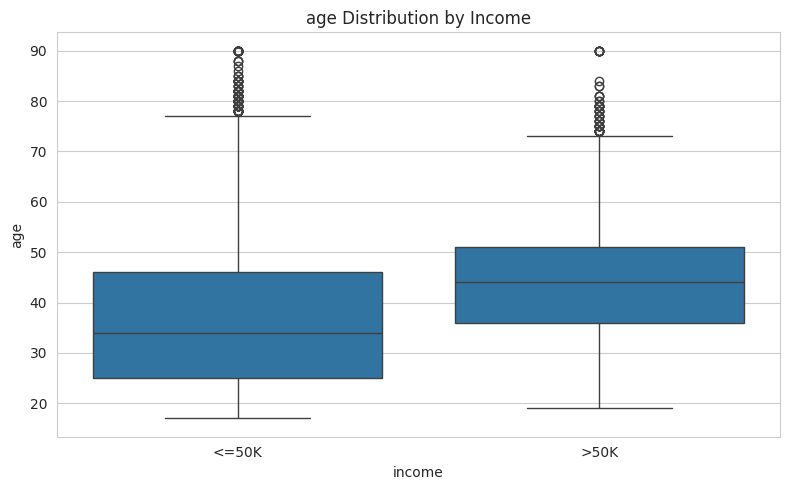

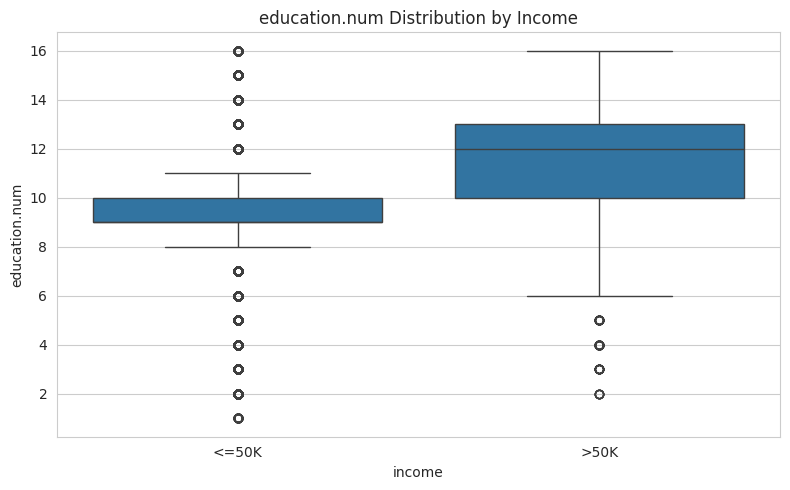

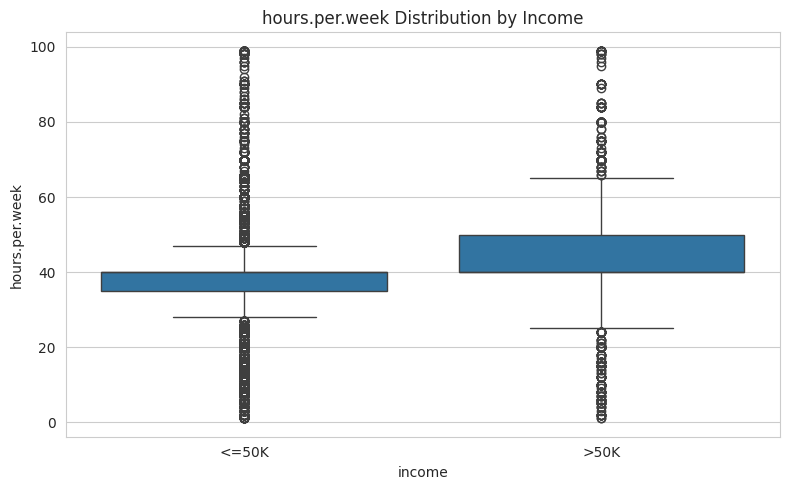

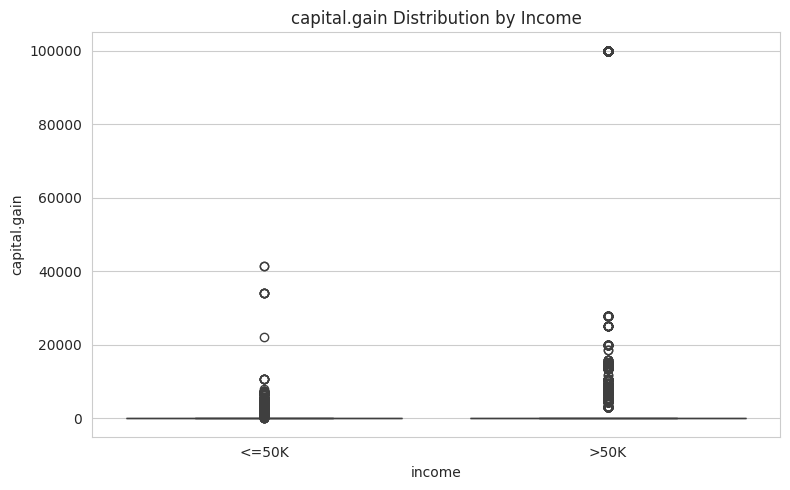

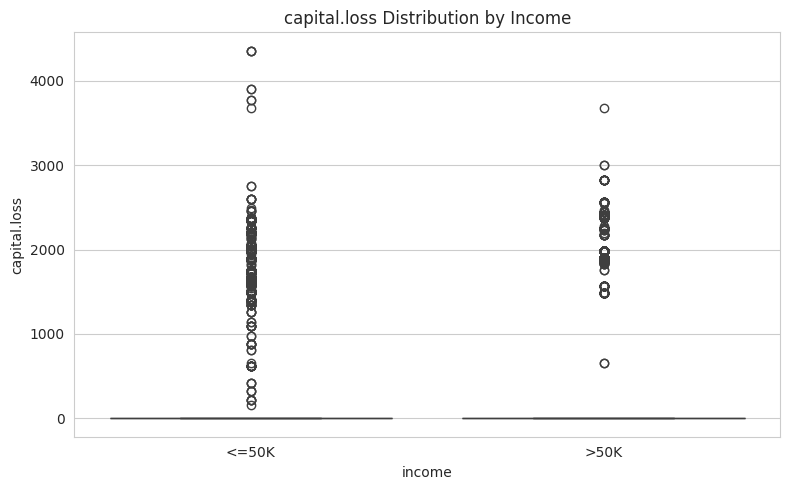

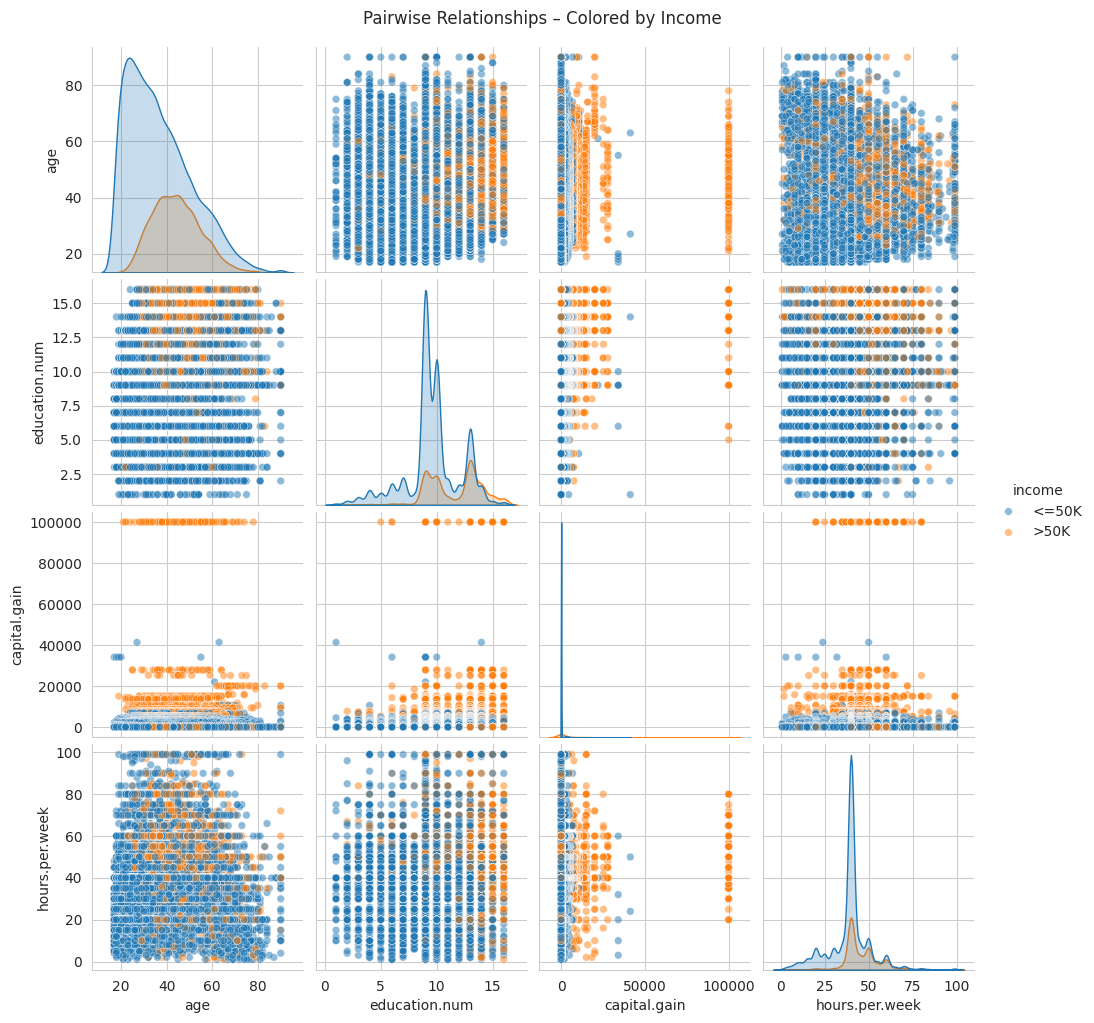

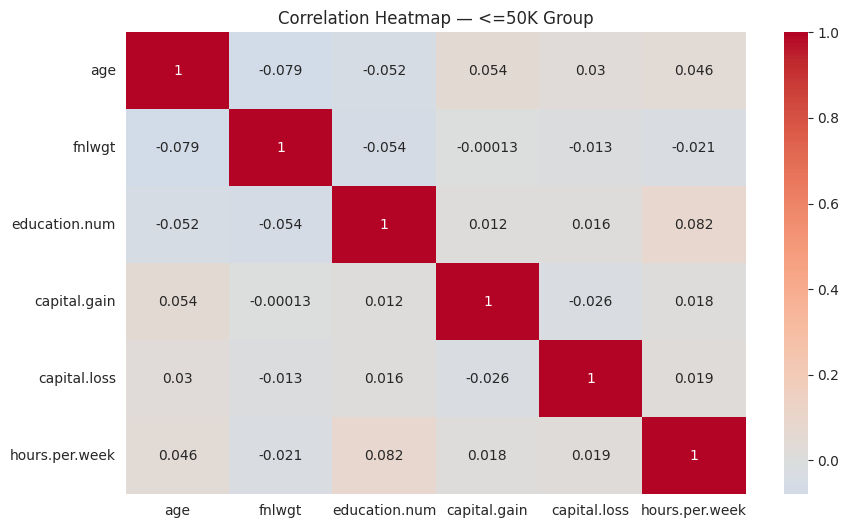

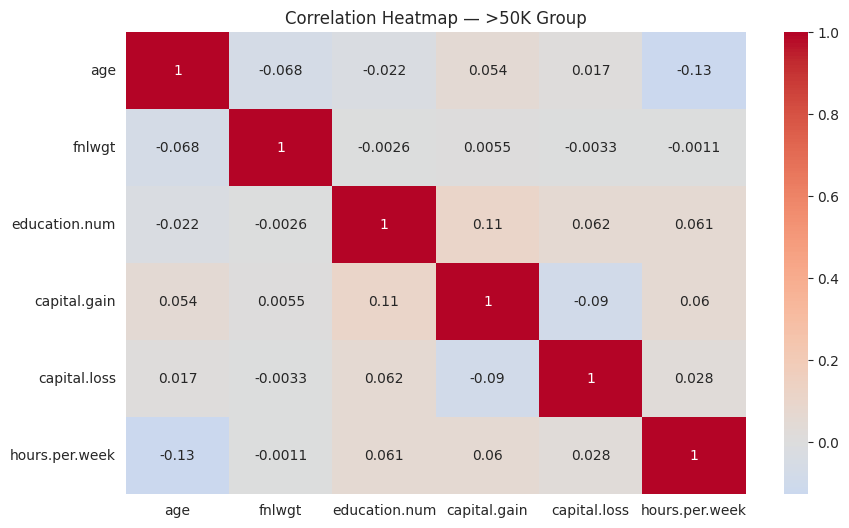

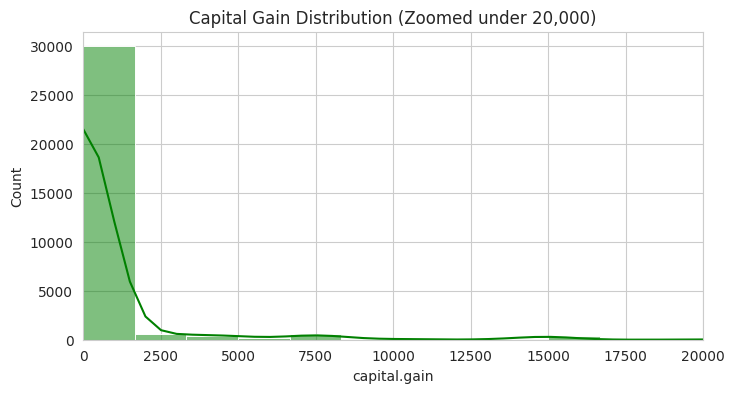

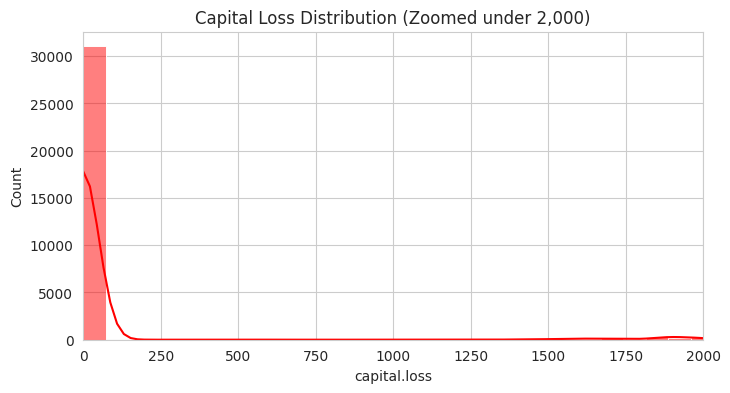

In [8]:
# --- Boxplots: Continuous vs Income ---
continuous_features = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']
for col in continuous_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=data, x='income', y=col)
    plt.title(f"{col} Distribution by Income")
    plt.tight_layout()
    plt.show()

# --- Pairplot ---
sns.pairplot(
    data,
    vars=["age","education.num","capital.gain","hours.per.week"],
    hue="income",
    plot_kws={'alpha':0.5, 's':30}
)
plt.suptitle("Pairwise Relationships – Colored by Income", y=1.02)
plt.show()

# --- Correlations for subgroups ---
plt.figure(figsize=(10,6))
sns.heatmap(
    data[data['income'] == '<=50K'].select_dtypes(include='number').corr(),
    cmap='coolwarm',
    center=0,
    annot=True
)
plt.title("Correlation Heatmap — <=50K Group")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(
    data[data['income'] == '>50K'].select_dtypes(include='number').corr(),
    cmap='coolwarm',
    center=0,
    annot=True
)
plt.title("Correlation Heatmap — >50K Group")
plt.show()

# --- Capital Gain / Loss ---
plt.figure(figsize=(8,4))
sns.histplot(data['capital.gain'], bins=60, color='green', kde=True)
plt.xlim(0, 20000)
plt.title("Capital Gain Distribution (Zoomed under 20,000)")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data['capital.loss'], bins=60, color='red', kde=True)
plt.xlim(0, 2000)
plt.title("Capital Loss Distribution (Zoomed under 2,000)")
plt.show()


In [9]:
print("\n" + "="*60)
print("STEP 3: HANDLING MISSING VALUES")
print("="*60)

missing_cols = data.columns[data.isnull().any()].tolist()
print(f"\nColumns with missing values: {missing_cols}")

for col in missing_cols:
    mode_val = data[col].mode()[0]
    missing_count = data[col].isnull().sum()
    data[col].fillna(mode_val, inplace=True)
    print(f"  ✓ Imputed {missing_count} values in '{col}' with mode: '{mode_val}'")

print("\n✓ All missing values handled successfully")
print(f"✓ Remaining missing values: {data.isnull().sum().sum()}")



STEP 3: HANDLING MISSING VALUES

Columns with missing values: ['workclass', 'occupation', 'native.country']
  ✓ Imputed 1836 values in 'workclass' with mode: 'Private'
  ✓ Imputed 1843 values in 'occupation' with mode: 'Prof-specialty'
  ✓ Imputed 583 values in 'native.country' with mode: 'United-States'

✓ All missing values handled successfully
✓ Remaining missing values: 0


In [10]:
print("\n" + "="*60)
print("STEP 4: FEATURE INSPECTION & REMOVAL")
print("="*60)

# Drop fnlwgt (survey weight)
if 'fnlwgt' in data.columns:
    data = data.drop('fnlwgt', axis=1)
    print("\n✓ Dropped 'fnlwgt' (survey weight)")

# Combine rare categories in workclass
print("\n--- Workclass value counts before combining ---")
print(data['workclass'].value_counts())

rare_workclass = ['Without-pay', 'Never-worked']
data['workclass'] = data['workclass'].replace(rare_workclass, 'Other')
print(f"\n✓ Combined rare workclass categories into 'Other'")
print(data['workclass'].value_counts())

# Group rare countries into 'Other'
print("\n--- Native country value counts (showing countries < 100) ---")
country_counts = data['native.country'].value_counts()
print(country_counts[country_counts < 100])

rare_countries = country_counts[country_counts < 100].index.tolist()
data['native.country'] = data['native.country'].replace(rare_countries, 'Other')
print(f"\n✓ Grouped {len(rare_countries)} rare countries into 'Other'")



STEP 4: FEATURE INSPECTION & REMOVAL

✓ Dropped 'fnlwgt' (survey weight)

--- Workclass value counts before combining ---
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

✓ Combined rare workclass categories into 'Other'
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Other                  21
Name: count, dtype: int64

--- Native country value counts (showing countries < 100) ---
native.country
Cuba                          95
England                       90
Jamaica                       81
South                         80
China                         75
Italy                         73
Dominican-Republic            70
Vietnam                       67
Guatemala             


STEP 5: FEATURE TRANSFORMATION

--- Capital Gain/Loss before transformation ---
Capital Gain - Mean: 1077.65, Max: 99999
Capital Loss - Mean: 87.30, Max: 4356

✓ Applied log1p transformation to capital.gain and capital.loss

--- Capital Gain/Loss after transformation ---
Capital Gain - Mean: 0.73, Max: 11.51
Capital Loss - Mean: 0.35, Max: 8.38

✓ Created 'net_capital' feature (capital.gain - capital.loss)


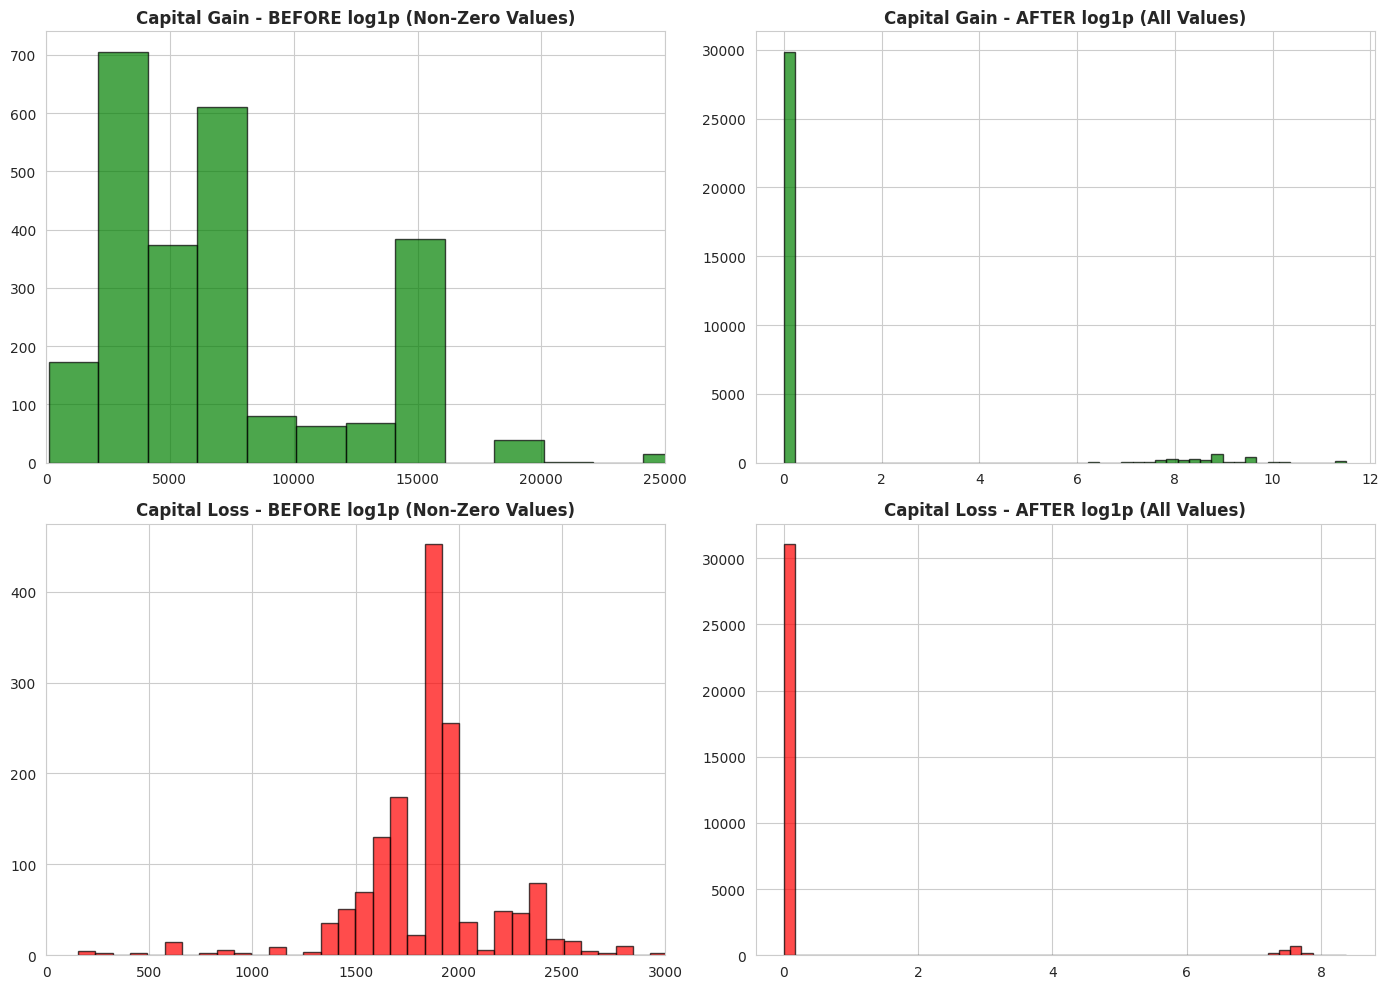

In [11]:
print("\n" + "="*60)
print("STEP 5: FEATURE TRANSFORMATION")
print("="*60)

print("\n--- Capital Gain/Loss before transformation ---")
print(f"Capital Gain - Mean: {data['capital.gain'].mean():.2f}, Max: {data['capital.gain'].max()}")
print(f"Capital Loss - Mean: {data['capital.loss'].mean():.2f}, Max: {data['capital.loss'].max()}")

# SAVE ORIGINAL VALUES BEFORE TRANSFORMATION
capital_gain_original = data['capital.gain'].copy()
capital_loss_original = data['capital.loss'].copy()

# Apply log transformation
data['capital.gain'] = np.log1p(data['capital.gain'])
data['capital.loss'] = np.log1p(data['capital.loss'])
print("\n✓ Applied log1p transformation to capital.gain and capital.loss")

print("\n--- Capital Gain/Loss after transformation ---")
print(f"Capital Gain - Mean: {data['capital.gain'].mean():.2f}, Max: {data['capital.gain'].max():.2f}")
print(f"Capital Loss - Mean: {data['capital.loss'].mean():.2f}, Max: {data['capital.loss'].max():.2f}")

# Create net capital feature
data['net_capital'] = data['capital.gain'] - data['capital.loss']
print("\n✓ Created 'net_capital' feature (capital.gain - capital.loss)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Row 1: Capital Gain BEFORE
axes[0, 0].hist(capital_gain_original[capital_gain_original > 0], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Capital Gain - BEFORE log1p (Non-Zero Values)', fontweight='bold')
axes[0, 0].set_xlim(0, 25000)

# AFTER
axes[0, 1].hist(data['capital.gain'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Capital Gain - AFTER log1p (All Values)', fontweight='bold')

# Row 2: Capital Loss BEFORE
axes[1, 0].hist(capital_loss_original[capital_loss_original > 0], bins=50, color='red', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Capital Loss - BEFORE log1p (Non-Zero Values)', fontweight='bold')
axes[1, 0].set_xlim(0, 3000)

# AFTER
axes[1, 1].hist(data['capital.loss'], bins=50, color='red', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Capital Loss - AFTER log1p (All Values)', fontweight='bold')

plt.tight_layout()
plt.show()


In [12]:
print("\n" + "="*60)
print("STEP 6: PREPARING TASK-SPECIFIC DATASETS")
print("="*60)

# Define numeric columns (after transformations and drops)
numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss',
                'hours.per.week', 'net_capital']

# ---------------- Clustering ----------------
print("\n--- Preprocessing for CLUSTERING ---")
data_clustering = data.copy()

categorical_cols_cluster = data_clustering.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols_cluster:
    data_clustering[col] = le.fit_transform(data_clustering[col])

scaler_cluster = StandardScaler()
data_clustering[numeric_cols] = scaler_cluster.fit_transform(data_clustering[numeric_cols])

data_clustering_no_target = data_clustering.drop(columns=['income'])

print(f"✓ Clustering data shape: {data_clustering_no_target.shape}")

# ---------------- Classification ----------------
print("\n--- Preprocessing for CLASSIFICATION ---")

data_classification = pd.get_dummies(data, drop_first=True)

X_class = data_classification.drop("income_>50K", axis=1)
y_class = data_classification["income_>50K"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

scaler_class = StandardScaler()
numeric_features_in_class = [col for col in numeric_cols if col in X_train_class.columns]

X_train_class_scaled = X_train_class.copy()
X_test_class_scaled = X_test_class.copy()

X_train_class_scaled[numeric_features_in_class] = scaler_class.fit_transform(
    X_train_class[numeric_features_in_class]
)
X_test_class_scaled[numeric_features_in_class] = scaler_class.transform(
    X_test_class[numeric_features_in_class]
)

X_train_class = X_train_class_scaled
X_test_class = X_test_class_scaled

# ---------------- Regression ----------------
print("\n--- Preprocessing for REGRESSION ---")

data_regression_prep = data.copy()
y_reg = data_regression_prep['hours.per.week']
data_regression_prep = data_regression_prep.drop(columns=['hours.per.week', 'income'])

data_regression = pd.get_dummies(data_regression_prep, drop_first=True)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    data_regression, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
numeric_features_in_reg = [col for col in numeric_cols if col in X_train_reg.columns and col != 'hours.per.week']

X_train_reg_scaled = X_train_reg.copy()
X_test_reg_scaled = X_test_reg.copy()

X_train_reg_scaled[numeric_features_in_reg] = scaler_reg.fit_transform(
    X_train_reg[numeric_features_in_reg]
)
X_test_reg_scaled[numeric_features_in_reg] = scaler_reg.transform(
    X_test_reg[numeric_features_in_reg]
)

X_train_reg = X_train_reg_scaled
X_test_reg = X_test_reg_scaled



STEP 6: PREPARING TASK-SPECIFIC DATASETS

--- Preprocessing for CLUSTERING ---
✓ Clustering data shape: (32561, 14)

--- Preprocessing for CLASSIFICATION ---

--- Preprocessing for REGRESSION ---


In [13]:
print("\n" + "="*60)
print("✅ PREPROCESSING PIPELINE COMPLETE")
print("="*60)
print(f"""
📊 DATASET SUMMARY:
   • Original shape: {data.shape}
   • Features engineered: log1p transformations, net_capital
   • Missing values: All imputed with mode
   • Rare categories: Combined into 'Other'
   • Dropped features: fnlwgt

🎯 READY-TO-USE DATASETS:
   1. CLUSTERING:  data_clustering_no_target ({data_clustering_no_target.shape})
   2. CLASSIFICATION:
      - X_train_class: {X_train_class.shape}
      - X_test_class: {X_test_class.shape}
      - y_train_class: {y_train_class.shape}
      - y_test_class: {y_test_class.shape}
   3. REGRESSION:
      - X_train_reg: {X_train_reg.shape}
      - X_test_reg: {X_test_reg.shape}
      - y_train_reg: {y_train_reg.shape}
      - y_test_reg: {y_test_reg.shape}

🚀 Next Steps:
   → Run clustering algorithms (K-Means, DBSCAN)
   → Train classifiers (Logistic Regression, Random Forest, XGBoost)
   → Build regression models (Linear Regression, Gradient Boosting)
""")

print("\n✓ Data preprocessing completed successfully.")



✅ PREPROCESSING PIPELINE COMPLETE

📊 DATASET SUMMARY:
   • Original shape: (32561, 15)
   • Features engineered: log1p transformations, net_capital
   • Missing values: All imputed with mode
   • Rare categories: Combined into 'Other'
   • Dropped features: fnlwgt

🎯 READY-TO-USE DATASETS:
   1. CLUSTERING:  data_clustering_no_target ((32561, 14))
   2. CLASSIFICATION: 
      - X_train_class: (26048, 64)
      - X_test_class: (6513, 64)
      - y_train_class: (26048,)
      - y_test_class: (6513,)
   3. REGRESSION: 
      - X_train_reg: (26048, 63)
      - X_test_reg: (6513, 63)
      - y_train_reg: (26048,)
      - y_test_reg: (6513,)

🚀 Next Steps:
   → Run clustering algorithms (K-Means, DBSCAN)
   → Train classifiers (Logistic Regression, Random Forest, XGBoost)
   → Build regression models (Linear Regression, Gradient Boosting)


✓ Data preprocessing completed successfully.


In [15]:
import os

save_path = '/content/drive/MyDrive/preprocessed/'
os.makedirs(save_path, exist_ok=True)

print("Folder created:", save_path)

data_clustering_no_target.to_csv(save_path + 'clustering.csv', index=False)
X_train_class.to_csv(save_path + 'X_train_class.csv', index=False)



Folder created: /content/drive/MyDrive/preprocessed/
